In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dataset = pd.read_csv('/content/gdrive/MyDrive/creditcard fraud.csv')

Mounted at /content/gdrive


In [4]:
# First 5 rows of the dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Last 5 rows of the dataset
dataset.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Understanding dataset informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

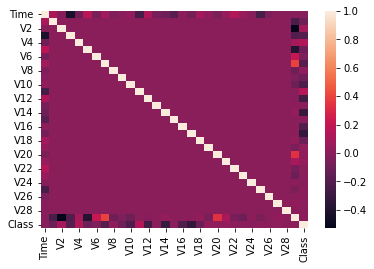

In [21]:
# Visualizing the dataset 
sns.heatmap(dataset.corr())

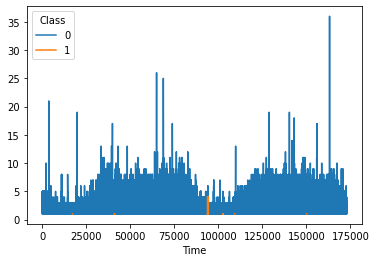

In [22]:
fraudtime= dataset.groupby(['Time', 'Class']).Class.count().unstack()
fraudtime.plot(kind='line')

In [7]:
# Check the number of missing values in each column
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Understanding the distribution of legit transactions & fraudulent transactions
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Data separation into genuine and fraud for analysis
genuine = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

print(genuine.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# Understanding the statistical measures of the genuine dataset
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# Understanding the statistical measures of the fraud dataset
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

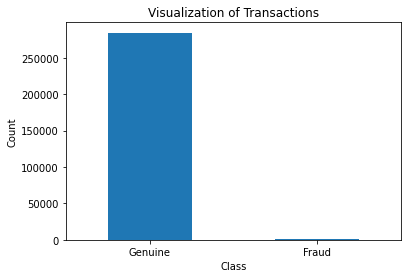

In [12]:
# Visualizing the transactions
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataset.value_counts(dataset['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
# Compare the values for both transactions
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
# Undersampling (as we can see from the visualization, the dataset is highly unbalanced, so to ensure accuracy and precision of our model and to overcome biasing, we are trying to make the data balanced)
genuine_sample = genuine.sample(n=492)

In [15]:
# Creating new balanced dataset by concatenating genuine_sample and fraud data
new_dataset = pd.concat([genuine_sample, fraud], axis=0)

In [16]:
# Feature Scaling the columns Amount and Time, as the rest columns are result of PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


new_dataset["Amount"] = sc.fit_transform(new_dataset["Amount"].values.reshape(-1, 1))
new_dataset["Time"] = sc.fit_transform(new_dataset["Time"].values.reshape(-1, 1))


In [17]:
# First 5 rows of the dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57550,-0.787148,-0.297856,1.016473,1.488995,1.019436,-0.521756,-0.895310,0.394749,-0.077425,-0.313749,0.337501,-0.173252,-0.606321,-1.014634,0.484957,1.826032,-0.489726,0.361984,-0.118355,1.499259,0.182755,-0.147002,-0.360812,0.151682,0.684039,-0.933080,0.222097,0.272888,0.233317,-0.394643,0
69546,-0.674241,-1.052957,-0.344769,1.465241,-2.041320,0.638224,1.049563,-0.170066,0.307541,-1.115600,-0.074460,-0.288648,-0.105684,0.731049,-0.740332,-1.242915,1.311174,-0.242301,-1.168130,1.083035,0.049366,-0.150442,-0.419917,-0.441558,-1.681927,0.452577,-0.396917,0.014812,-0.006766,-0.162707,0
3128,-1.713333,-3.800086,-2.537745,0.658889,0.815821,1.946052,-1.613457,0.121233,-0.177710,-0.055779,0.268605,1.333091,0.492668,0.294556,-0.561318,0.576476,0.933745,-0.545689,0.434232,0.759346,-1.608353,-0.842728,-0.258254,2.566918,-0.041777,0.586398,0.209261,0.603540,-0.137895,-0.407847,0
50259,-0.859690,1.077362,0.131681,0.446332,2.610630,-0.042955,0.347846,0.003069,0.038098,-0.108313,0.494189,-1.807989,-0.236160,-0.213095,-0.170839,-0.799553,0.360596,-0.435714,-0.202532,-0.321732,-0.020184,-0.094449,-0.249795,-0.243470,-0.445417,0.702062,0.123110,-0.007630,0.023710,-0.103000,0
187465,0.841966,2.047129,0.233446,-1.692033,0.537368,0.188073,-1.518207,0.313864,-0.425343,0.517828,-0.488177,-0.260036,0.320201,0.472023,-0.821721,0.845487,0.178209,0.372782,0.439319,-0.440766,-0.165872,0.204741,0.779419,-0.029548,-0.004109,0.266323,-0.106152,-0.000199,-0.029111,-0.400870,0


In [18]:
# Last 5 rows of the dataset
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,1.693418,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.283584,1
280143,1.697614,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.435360,1
280149,1.697696,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.094742,1
281144,1.710284,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.643241,1
281674,1.718104,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.250897,1


In [19]:
new_dataset['Class'].value_counts()


0    492
1    492
Name: Class, dtype: int64

In [20]:
# Compare the values for both the transactions
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.11595,0.022569,0.101885,0.015383,-0.004231,-0.018079,-0.063669,-0.020025,0.000570,0.031705,0.030371,-0.048536,0.029262,0.021154,-0.000224,0.045497,0.056102,0.001705,-0.020328,-0.020209,-0.016459,-0.025409,-0.058947,0.000293,-0.015787,0.001353,0.015889,0.027163,-0.010125,-0.100988
1,-0.11595,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.100988


In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 57550 to 281674
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64


In [22]:
print (X)

            Time        V1        V2  ...       V27       V28    Amount
57550  -0.787148 -0.297856  1.016473  ...  0.272888  0.233317 -0.394643
69546  -0.674241 -1.052957 -0.344769  ...  0.014812 -0.006766 -0.162707
3128   -1.713333 -3.800086 -2.537745  ...  0.603540 -0.137895 -0.407847
50259  -0.859690  1.077362  0.131681  ... -0.007630  0.023710 -0.103000
187465  0.841966  2.047129  0.233446  ... -0.000199 -0.029111 -0.400870
...          ...       ...       ...  ...       ...       ...       ...
279863  1.693418 -1.927883  1.125653  ...  0.292680  0.147968  1.283584
280143  1.697614  1.378559  1.289381  ...  0.389152  0.186637 -0.435360
280149  1.697696 -0.676143  1.126366  ...  0.385107  0.194361 -0.094742
281144  1.710284 -3.113832  0.585864  ...  0.884876 -0.253700  0.643241
281674  1.718104  1.991976  0.158476  ...  0.002988 -0.015309 -0.250897

[984 rows x 30 columns]


In [23]:
print(Y)

57550     0
69546     0
3128      0
50259     0
187465    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 0)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
# Lets make the ANN
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)


Epoch 1/100
79/79 [==============================] - 1s 2ms/step - loss: 0.6563 - accuracy: 0.8399
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.9174
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.9365
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9441
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.9479
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9504
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9517
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9530
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9543
Epoch 10/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.9581
Epoch 11/

In [27]:
# Predicting the ANN for both train and test data
Y_train_pred = classifier.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

In [28]:
# Making the Confusion Matrix for test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[95  4]
 [ 9 89]]


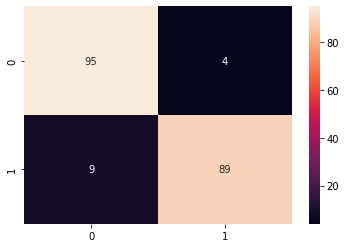

In [29]:
# Visualizing the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

In [30]:
#Performance metrics for both the training and testing data

# Accuracy 
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
print('Accuracy on Training data is %f' % training_data_accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy on Test data is %f' % accuracy)

#Precision
from sklearn.metrics import precision_score
training_data_precision = precision_score(Y_train_pred, Y_train)
print('Precision on Training data is %f' % training_data_precision)
precision = precision_score(Y_test, Y_pred)
print('Precision on Test data is %f' % precision)
 
# Recall
from sklearn.metrics import recall_score
training_data_recall = recall_score(Y_train_pred, Y_train)
print('Recall on Training data is %f' % training_data_recall)
recall = recall_score(Y_test, Y_pred)
print('Recall on Test data is %f' % recall)

Accuracy on Training data is 0.982211
Accuracy on Test data is 0.934010
Precision on Training data is 0.979695
Precision on Test data is 0.956989
Recall on Training data is 0.984694
Recall on Test data is 0.908163


# New section